In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [21]:
start = datetime.datetime(1993, 1, 1)
end = datetime.datetime.now()
spy = data.DataReader("SPY", 'yahoo', start, end)
gld = data.DataReader("GLD", 'yahoo', start, end)
inflation = data.DataReader(['CPIAUCSL'], 'fred', start, end)
gdp = data.DataReader(['GDP'], 'fred', start, end)

# extract close price and change column name
spy =pd.DataFrame(spy['Close'])
spy = spy.rename(columns={'Close':"spy"})
gld =pd.DataFrame(gld['Close'])
gld = gld.rename(columns={'Close':"gld"})


In [22]:
pd.options.display.min_rows = 999

In [23]:

comb = gdp.join(spy, how="outer").join(inflation, how="outer").join(gld, how="outer")
comb = comb.rename(columns={"GDP":"gdp", "CPIAUCSL":"inflation"})
comb['gdp']=comb['gdp'].interpolate()
comb['inflation']=comb['inflation'].interpolate()
comb=comb['1993-02-01':]
# comb=comb['1993-02-01':'2019-10-01']


In [24]:
comb['infAdj-spy']=(comb['spy']/comb['inflation'])*100
comb['gdpAdj-spy']=(comb['spy']/comb['gdp'])*100
comb['gdpinfAdj-spy']=(comb['gdpAdj-spy']/comb['inflation'])*100
comb['infAdj-gld']=(comb['gld']/comb['inflation'])*100


In [25]:
comb

,gdp,spy,inflation,gld,infAdj-spy,gdpAdj-spy,gdpinfAdj-spy,infAdj-gld
1993-02-01,6755.952333,NaN,143.100,NaN,NaN,NaN,NaN,NaN
1993-03-01,6782.445667,NaN,143.300,NaN,NaN,NaN,NaN,NaN
1993-04-01,6808.939000,NaN,143.800,NaN,NaN,NaN,NaN,NaN
1993-05-01,6833.325333,NaN,144.200,NaN,NaN,NaN,NaN,NaN
1993-06-01,6857.711667,NaN,144.300,NaN,NaN,NaN,NaN,NaN
1993-07-01,6882.098000,NaN,144.500,NaN,NaN,NaN,NaN,NaN
1993-08-01,6925.978000,NaN,144.800,NaN,NaN,NaN,NaN,NaN
1993-09-01,6969.858000,NaN,145.000,NaN,NaN,NaN,NaN,NaN
1993-10-01,7013.738000,NaN,145.600,NaN,NaN,NaN,NaN,NaN
1993-11-01,7047.709333,NaN,146.000,NaN,NaN,NaN,NaN,NaN


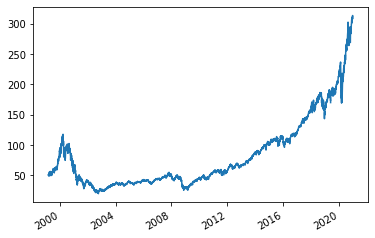

In [26]:
# SPY
comb['spy'].plot()

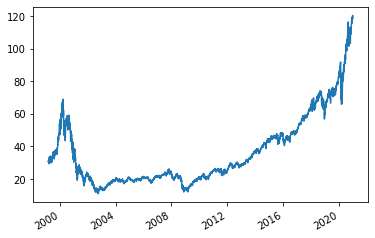

In [27]:
# Inflation Adjusted SPY
comb['infAdj-spy'].plot()

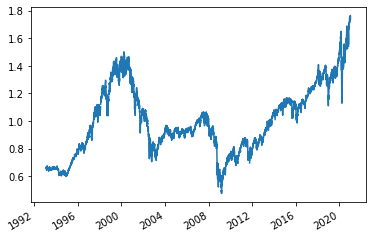

In [9]:
# GDP Adjusted SPY
comb['gdpAdj-spy'].plot()

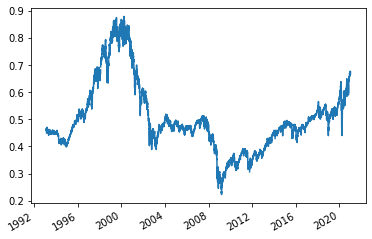

In [10]:
# GDP & Inflation Adjusted SPY
comb['gdpinfAdj-spy'].plot()

In [11]:
# GOLD

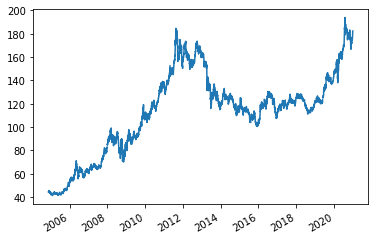

In [12]:
comb['gld'].plot()

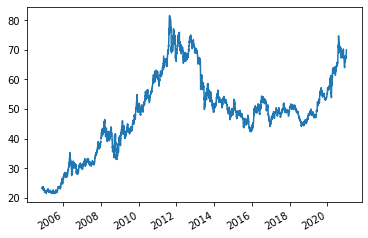

In [13]:
# Inflation Adjusted Gold
comb['infAdj-gld'].plot()

In [14]:
# CANADA


In [15]:
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime.now()
xiu = data.DataReader("XIU.TO", 'yahoo', start, end)
xiu =pd.DataFrame(xiu['Close'])
xiu = xiu.rename(columns={'Close':"xiu"})

canInflation = data.DataReader(['FPCPITOTLZGCAN'], 'fred', start, end)
canInflation = canInflation.rename(columns={'FPCPITOTLZGCAN':"canInflation"})
canGdp = data.DataReader(['MKTGDPCAA646NWDB'], 'fred', start, end)
canGdp = canGdp.rename(columns={'MKTGDPCAA646NWDB':"canGdp"})

In [16]:
combCan = xiu.join(canInflation, how="outer").join(canGdp,how="outer")
combCan['canInflation']=combCan['canInflation'].interpolate()
combCan['canGdp']=combCan['canGdp'].interpolate()
combCan['infAdj-xiu']=(combCan['xiu']/combCan['canInflation'])*100
combCan['gdpAdj-xiu']=(combCan['xiu']/combCan['canGdp'])*100
combCan['gdpinfAdj-spy']=(combCan['gdpAdj-xiu']/combCan['canInflation'])*100


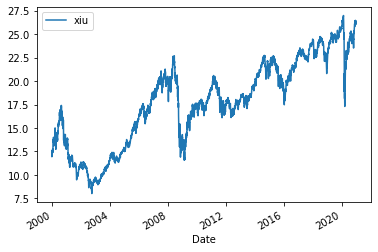

In [17]:
xiu.plot()

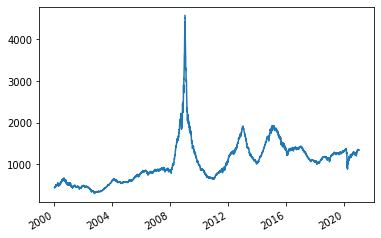

In [18]:
combCan['infAdj-xiu'].plot()

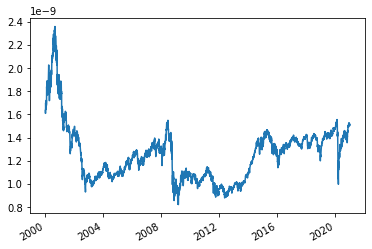

In [19]:
combCan['gdpAdj-xiu'].plot()

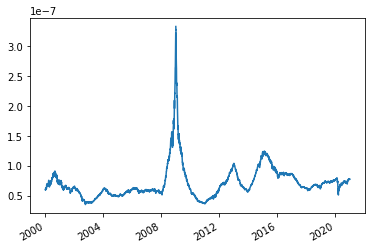

In [20]:
combCan['gdpinfAdj-spy'].plot()